ANALISIS EXPLORATORIO DE DATOS --- DATASET CS:GO

Fase 1 -- Comprender el negocio

En el siguiente EDA haremos un analisis extensivo de conjunto de datos de jugadores de cs:go, analizando estadisticas de forma que podamos recopilar informacion valiosa acerca de como ciertos parametros pueden afectar al rendimiento del jugador, asi como obtener informacion que pueda ser de utilidad para tener un panorama claro de como ciertas estadisticas siguen ciertos patrones para propositos de estudio

Fase 2 --- Comprender los datos

In [ ]:
#importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#cargar datos
uploaded = files.upload()
for fn in uploaded.keys():
    name = fn

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


In [ ]:
df = pd.read_csv(name, sep=";")


-- Exploracion inicial de datos

In [ ]:
#cantidad filas, columnas
df.shape

NameError: name 'df' is not defined

In [ ]:
#nombre de las columnas
df.columns

In [ ]:
#Muestra las primeras 5 filas para comprobar si los datos cargaron correctamente
display(df.head())

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
#Muestra qué tipo de datos hay, si es texto, número, booleano y cuántos datos faltan.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
#5 primeras filas de las columnas
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
#resumen general dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
#visualizacion de datos nulos
df.isna().sum()
#solo dos filas presentan datos nulos, junto a esto tambien esta una columna con error de carga (unnamed:0)

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


In [ ]:
#analisis estadistico basico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


Por parte del analisis anterior se pueden observar datos interesantes para entender el comportamiento de los jugadores

Por parte de la compra de armas
La gran mayoria usa armas de asalto como arma primaria, asi como que muy pocos usan armas pesadas o smg
Muy pocos compran granadas de daño, la gran mayoria solo compra utilidad

Por parte del los jugadores por partida
El promedio hace alrededor de 9 kills por partida, siendo 4 de estas con disparo a la cabeza


In [ ]:
# Se hacen las respectivas correlaciones entre variables
df_encoded = pd.get_dummies(df, columns=["Map", "Team"], drop_first=True)
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()
corr_matrix["MatchKills"].sort_values(ascending=False)


,MatchKills
MatchKills,1.000000
MatchHeadshots,0.831450
RoundId,0.807501
MatchFlankKills,0.641599
MatchAssists,0.510016
RoundKills,0.183402
RoundStartingEquipmentValue,0.179080
TeamStartingEquipmentValue,0.178526
RoundHeadshots,0.112018
RLethalGrenadesThrown,0.110577


Las anteriores correlaciones nos indican que los headshots son la estadistica que mas hace aumentar la cantidad de kills por partida, junto a esto le sigue el tener mayor cantidad de rondas ya que habria mas tiempo para realizar mas kills asi como que las kills por flanqueo tambien tienen una alta correlacion con la cantidad de kills por partida, en resumen realizar headshots y flanquear aumentan la cantidad de kills significativamente

In [ ]:
#verificacion de datos a los extremos
df["headshot_percentage"] = df["RoundHeadshots"] / df["RoundKills"]

In [ ]:
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['FirstKillTime'] = pd.to_numeric(df['FirstKillTime'], errors='coerce')

In [ ]:
df['headshot_percentage'] = df['RoundHeadshots'] / df['RoundKills']

In [ ]:
df['ImpactPlayerScore'] = df['RoundKills'] + 0.5 * df['RoundAssists'] + 1.5 * df['RoundHeadshots']

<Axes: xlabel='RoundKills', ylabel='Count'>

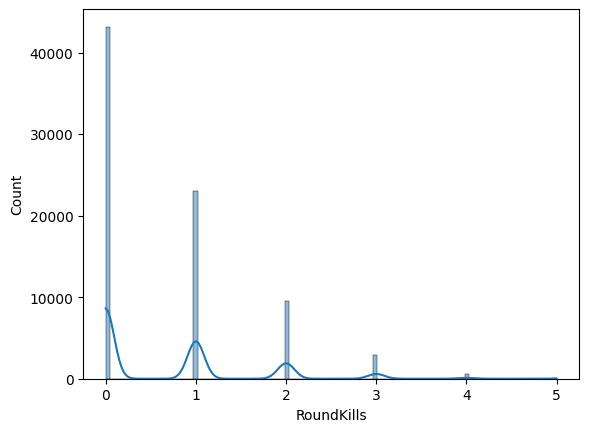

In [ ]:
#Dibuja un histograma para ver cuántos kills por ronda suelen hacer los jugadores.
sns.histplot(df['RoundKills'], kde=True)


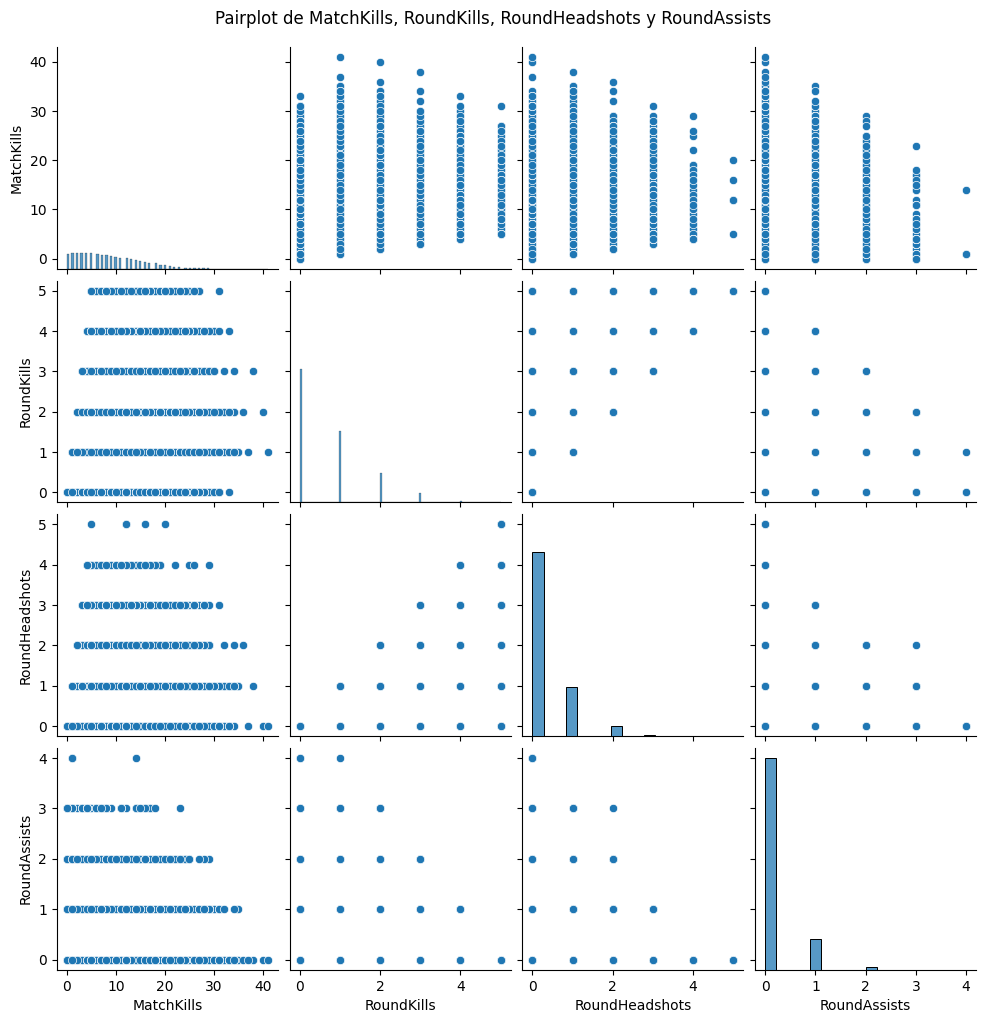

In [ ]:
#verificacion de posibles correlaciones en forma visual
sb.pairplot(df[["MatchKills", "RoundKills", "RoundHeadshots", "RoundAssists"]])
plt.suptitle("Pairplot de MatchKills, RoundKills, RoundHeadshots y RoundAssists", y=1.02)
plt.show()

<Axes: xlabel='Survived', ylabel='RoundKills'>

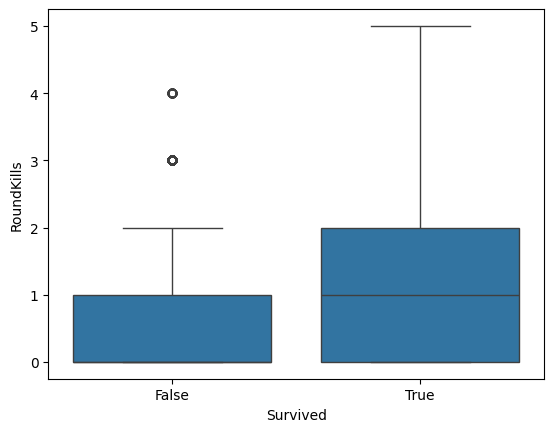

In [ ]:
#Dibuja un boxplot para comparar kills entre los que sobreviven y los que mueren.
sns.boxplot(x='Survived', y='RoundKills', data=df)

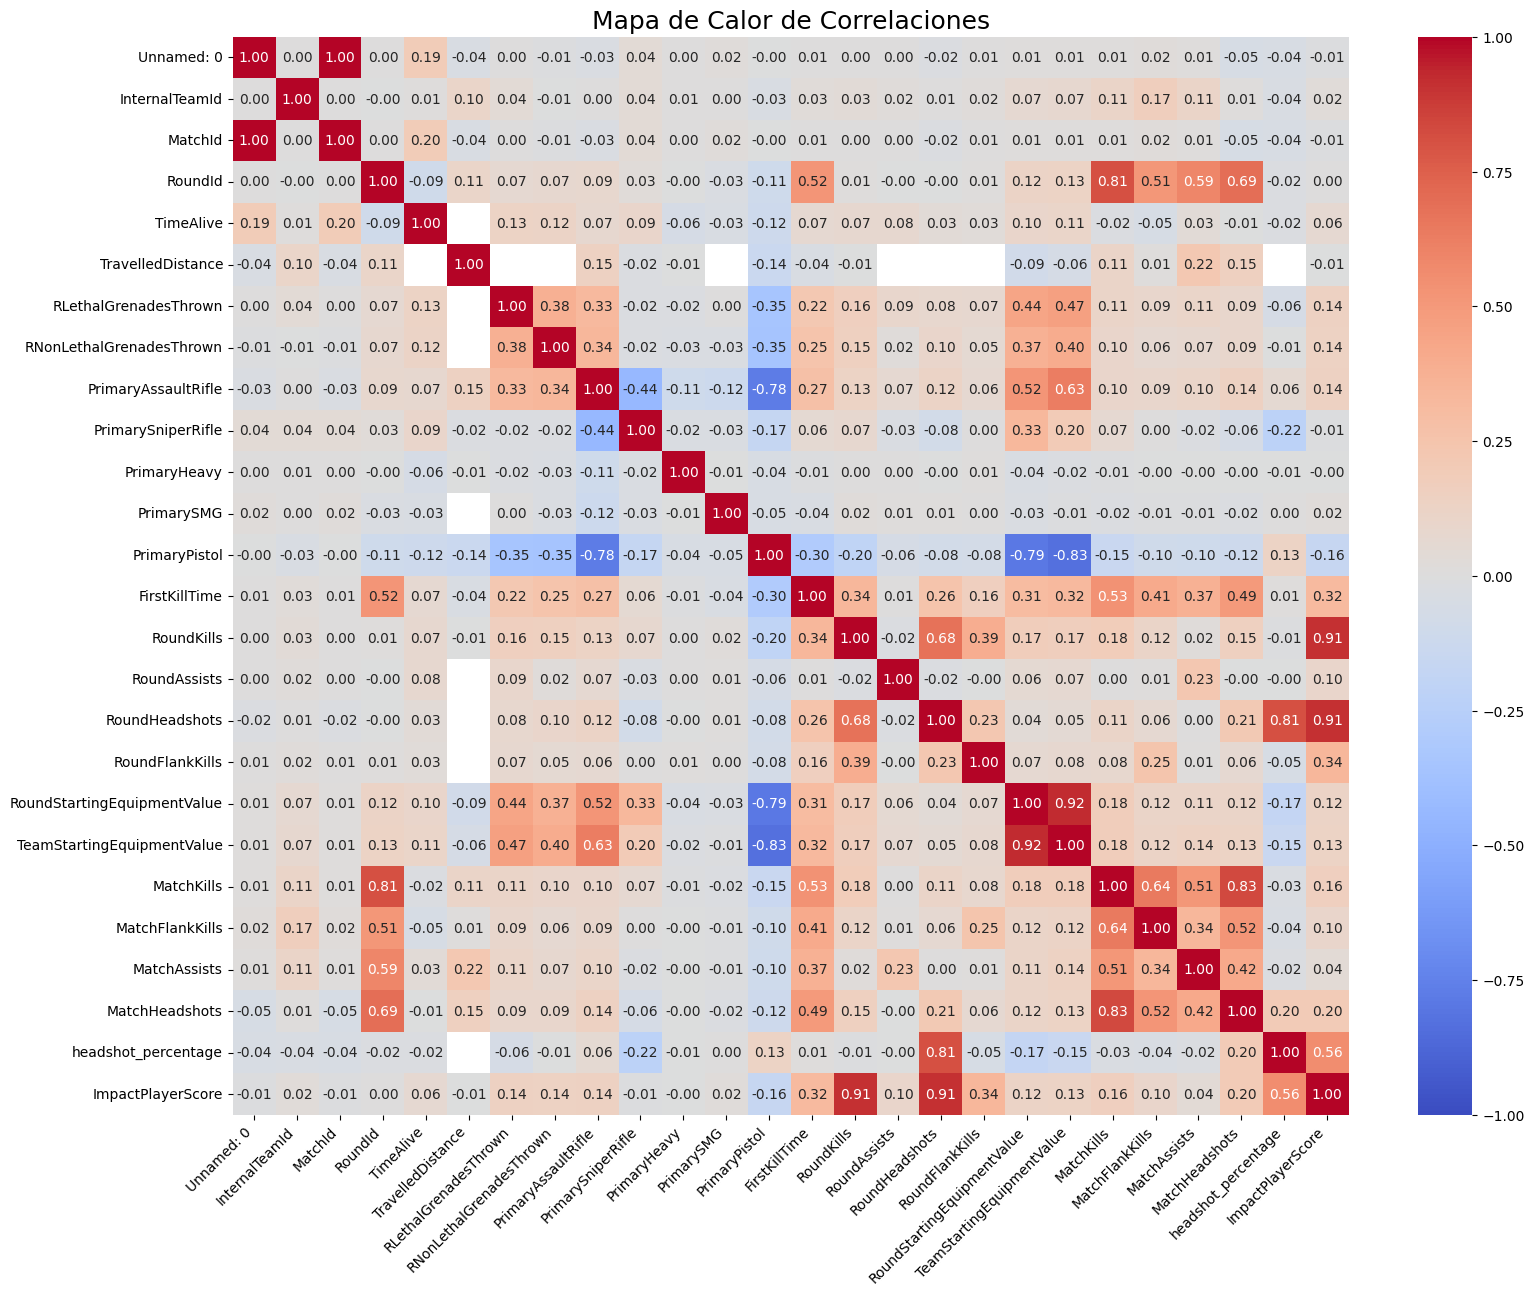

In [ ]:
#Este gráfico sirve para identificar fácilmente qué variables están relacionadas entre sí y qué tan fuerte es esa relación.
plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Mapa de Calor de Correlaciones", fontsize=18)
plt.show()